# 1) Test split() function

In [19]:
import numpy as np
import matplotlib.pyplot as plt

show = False # Turn it to True if you want to plot input data in a image
# Input data --------------------------------------------
i_matrix = np.array([[0, 1, 0, 0], [0, 0, 1, 0]])
print('Original matrix: \n', i_matrix)
if show:
    plt.matshow(i_matrix)
    plt.title('Original matrix')
    plt.show()

# Function ----------------------------------------------
def split(matrix, depth):
    '''
    matrix: matrix shape(mxn)
    Depth: a number > 1
    '''
    n_tensor = [] # new created tensor
    for i in range(0, depth):
        # Creating the padding zero to compensate for the lost path of the shifted matrix
        r_matrix = len(matrix)
        pad = np.zeros((r_matrix, i))

        # 1: a new matrix is generated by concatenate the cut matrix and zero padding
        # 2: Collecting new matrices into a tensor
        n_tensor.append(np.concatenate((matrix[:, i:], pad), axis=1))
    return np.array(n_tensor)

# Show each lice of tensor after using split() function
print('\n' + '#'*15 + ' Print each slice of tensor after using split function ' + '#'*10)
tensor = split(i_matrix, 4)
for idx, i in enumerate(tensor):
    print(f'\nDepth number {idx+1}:')
    print(i)

Original matrix: 
 [[0 1 0 0]
 [0 0 1 0]]

############### Print each slice of tensor after using split function ##########

Depth number 1:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]]

Depth number 2:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]

Depth number 3:
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]]

Depth number 4:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# 2) Test yield

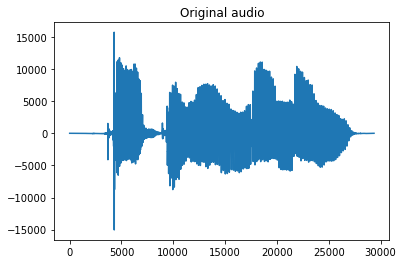


#################### Using audioSource function ####################



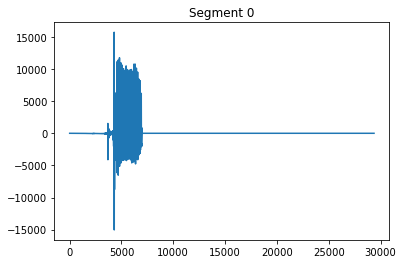

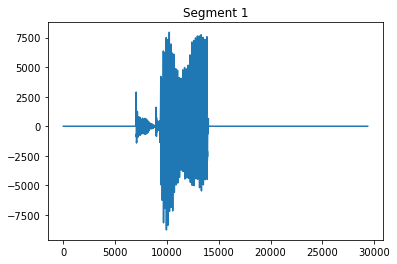

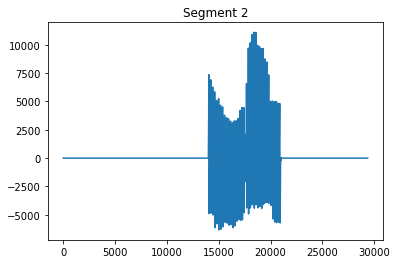

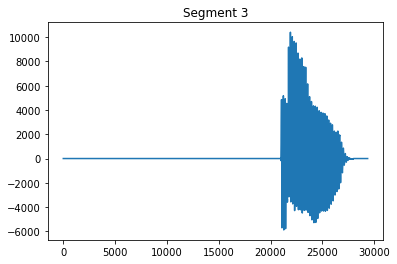

In [25]:
from scipy.io import wavfile
import matplotlib.pyplot as plt

def split():
    i = 0
    while True:
        yield i 
        i+=1

def audioSource(x, length=7000):
    '''
    x: 1D data
    length: length of expected segment
    '''
    for i in split():
        if (i+1)*length > len(x):
            break
        
        # short segment of audio is cut from original one
        cut_audio = x[i*length: (i+1)*length]

        # Plot------------------------------------------
        pad_h = np.zeros((i*length))
        pad_t = np.zeros((len(x) - (i+1)*length))
        s_audio = np.concatenate((pad_h, cut_audio, pad_t))
        plt.plot(s_audio)
        plt.title(f'Segment {i}')
        plt.show()

sample_rate, x = wavfile.read('wav/apple_and_lemmon.wav') 
plt.plot(x)
plt.title('Original audio')
plt.show()
print('\n' + 20*'#' + ' Using audioSource function ' + 20*'#' + '\n')
audioSource(x)
